# **Proyek Prediksi Analitik: [Diabetes]**

## **Import Library**

In [76]:
# Melakukan import library
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
    mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

## **Data Wrangling**

### **Gathering Data**

In [4]:
# Membaca berkas CSV
diabetes_df = pd.read_csv("data/diabetes-dataset.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Assessing Data**

In [5]:
# Mendapatkan informasi dari dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Mengecek apakah ada data yang kosong
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Menghitung jumlah duplikasi data
print("Jumlah duplikasi:", diabetes_df.duplicated().sum())

Jumlah duplikasi: 0


In [17]:
# Mengambil kolom selain target
df_columns = diabetes_df.drop(columns=['Outcome', 'Pregnancies']).columns

# Membuat list untuk menampung kolom yang memiliki nilai 0
zero_columns = []

# Menghitung jumlah missing value
for col in df_columns:
    miss_val_count = (diabetes_df[col] == 0).sum()

    if miss_val_count != 0:
        zero_columns.append(col)
        print(f"{col}: {miss_val_count}")

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


## **Cleaning Data**

In [18]:
# Membuat dataframe baru
clean_df = diabetes_df.copy()

# Mengubah nilai 0 pada beberapa fitur menjadi Nan
for col in zero_columns:
    clean_df[col] = diabetes_df[col].apply(lambda x: None if x == 0 else x)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [33]:
# Membuat objek imputer
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)
df_imputed = imputer.fit_transform(clean_df)

# Menyimpan hasil imputasi
df_imputed = pd.DataFrame(df_imputed, columns=diabetes_df.columns)

# Menampilkan hasil imputasi
df_imputed

/home/refanzzzz/miniconda3/envs/diabetes-predictive-analytic/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00,186.75,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00,45.59,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,18.42,241.84,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00,94.00,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00,168.00,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00,180.00,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00,180.55,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00,112.00,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,26.47,150.81,30.1,0.349,47.0,1.0


## **Exploratory Data Analysis (EDA)**

In [34]:
# Melihat informasi deskriptif data
df_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.680378,72.382760,28.954701,157.702461,32.431056,0.471876,33.240885,0.348958
std,3.369578,30.529200,12.172642,9.724743,103.740538,6.887533,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,88.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.545000,133.915000,32.150000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.780000,192.437500,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
# Menyimpan daftar kolom
df_columns = df_imputed.columns

# Melakukan perulangan untuk menghitung nilai skewness tiap kolom
for col in df_columns:
    series = pd.Series(np.array(df_imputed[col]))
    print(f"{col}: {series.skew()}")

Pregnancies: 0.9016739791518588
Glucose: 0.5338749386474552
BloodPressure: 0.14126088124468034
SkinThickness: 0.6883240340214689
Insulin: 2.058396591166772
BMI: 0.6028095883450327
DiabetesPedigreeFunction: 1.919911066307204
Age: 1.1295967011444805
Outcome: 0.635016643444986


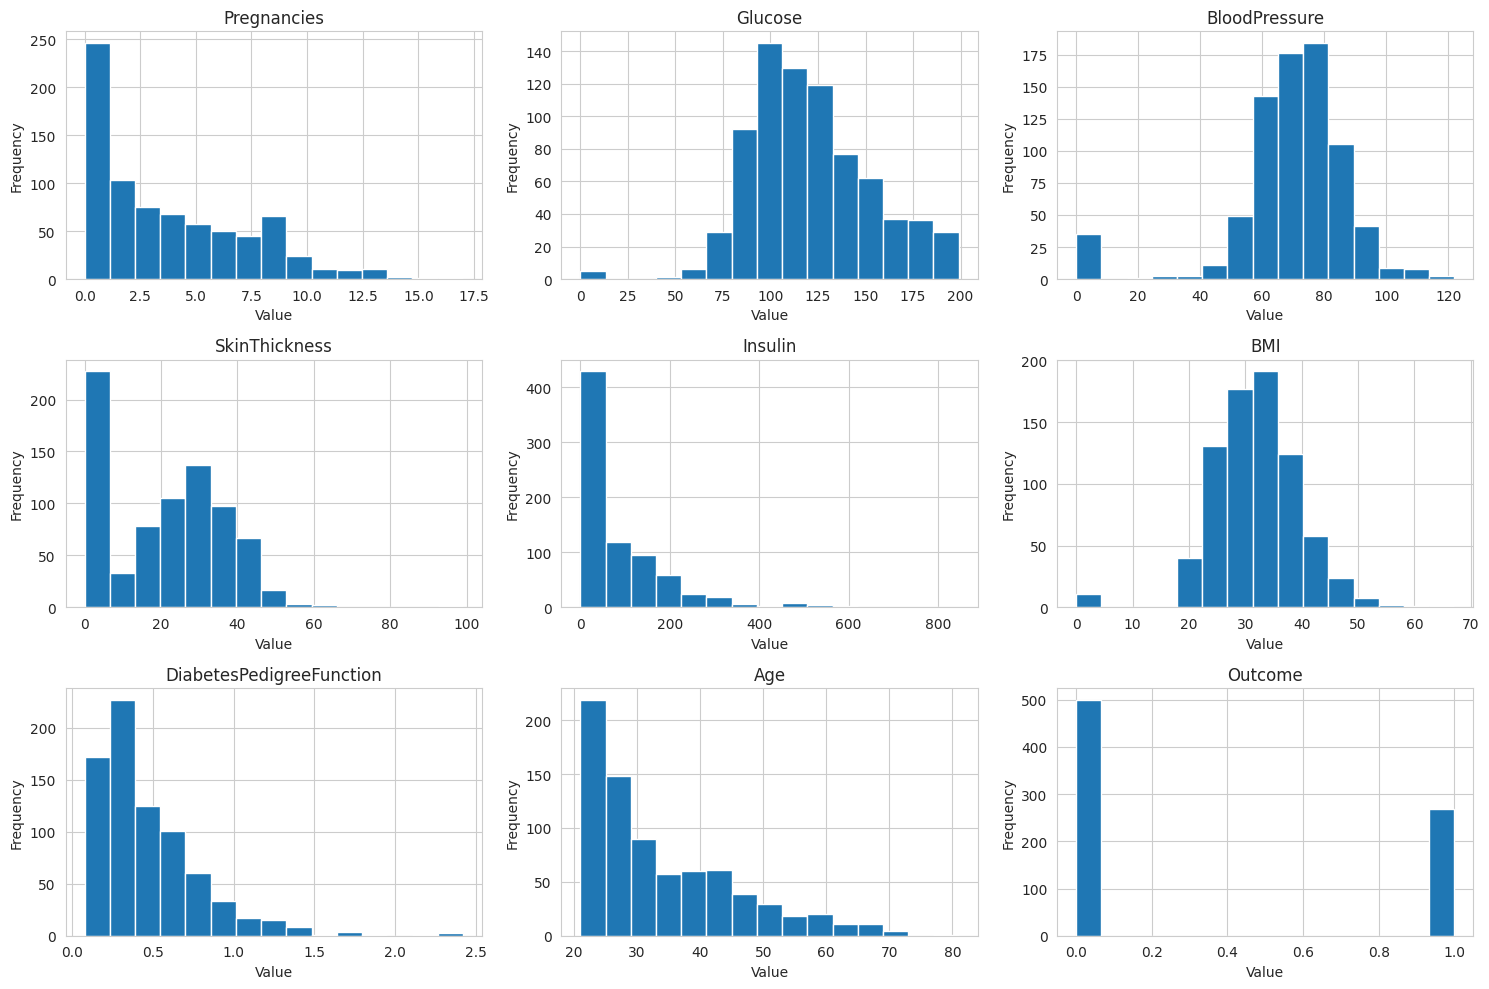

In [37]:
# Membuat subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Melakukan flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap kolom
for i, column in enumerate(df_imputed.columns):
    diabetes_df[column].hist(ax=axes[i], bins=15)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

In [38]:
# Mengecek korelasi dengan fungsi corr()
df_imputed.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130444,0.212573,0.116310,0.063267,0.024854,-0.033523,0.544341,0.221898
Glucose,0.130444,1.000000,0.233337,0.226451,0.663171,0.237201,0.137137,0.268991,0.496424
BloodPressure,0.212573,0.233337,1.000000,0.243081,0.161724,0.298737,0.003412,0.334150,0.178304
SkinThickness,0.116310,0.226451,0.243081,1.000000,0.259435,0.693291,0.120137,0.147588,0.266008
Insulin,0.063267,0.663171,0.161724,0.259435,1.000000,0.267109,0.125906,0.296484,0.346060
BMI,0.024854,0.237201,0.298737,0.693291,0.267109,1.000000,0.153145,0.027927,0.315305
DiabetesPedigreeFunction,-0.033523,0.137137,0.003412,0.120137,0.125906,0.153145,1.000000,0.033561,0.173844
Age,0.544341,0.268991,0.334150,0.147588,0.296484,0.027927,0.033561,1.000000,0.238356
Outcome,0.221898,0.496424,0.178304,0.266008,0.346060,0.315305,0.173844,0.238356,1.000000


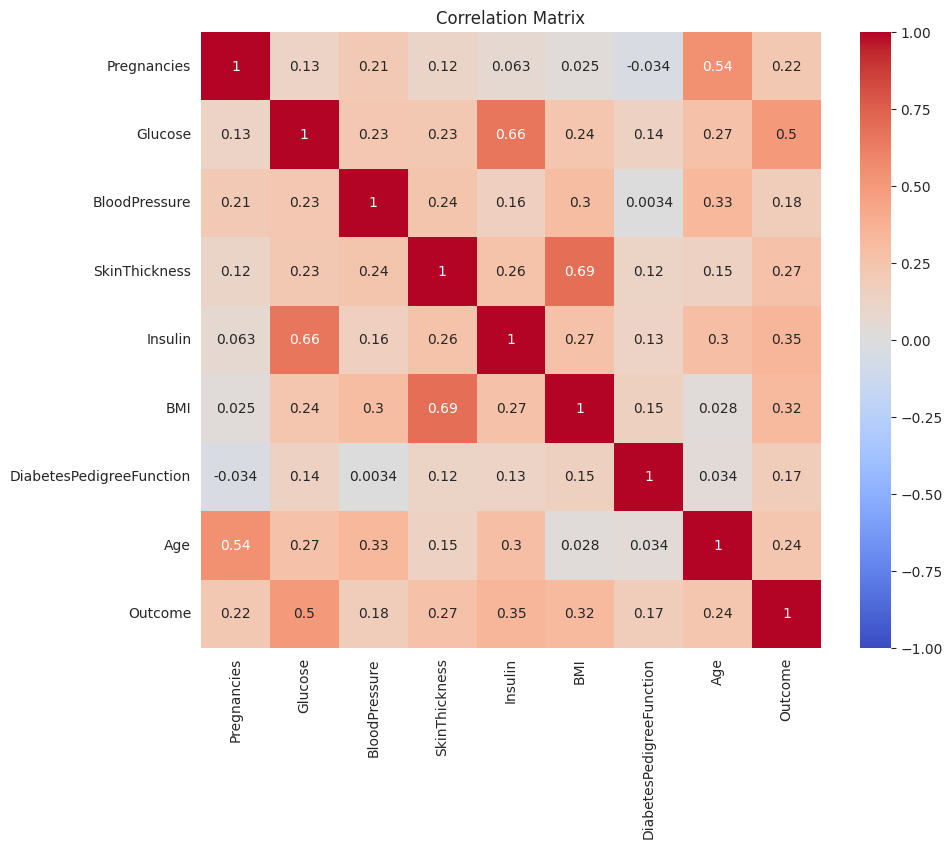

In [39]:
# Visualisasi korelasi antar variabel numerik
def show_corr_matrix(data):
    plt.figure(figsize=(10, 8))
    corr_matrix = data.corr(numeric_only=True)

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.show()


show_corr_matrix(df_imputed)

In [40]:
# Menggunakan value_counts() untuk menghitung jumlah data berdasarkan Outcome
df_imputed['Outcome'].value_counts()

Outcome
0.0    500
1.0    268
Name: count, dtype: int64

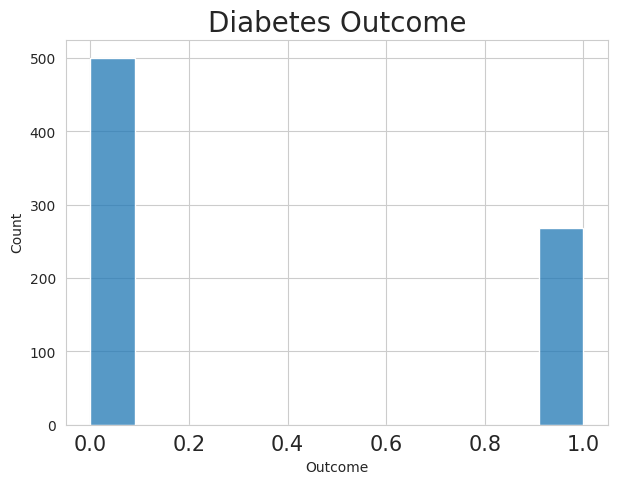

In [41]:
plt.figure(figsize=(7, 5))
sns.histplot(x="Outcome", data=df_imputed)

plt.title("Diabetes Outcome", fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.show()

In [42]:
# Membuat fungsi untuk menentukan kategori berdasarkan rentang umur
def check_age(age):
    if age < 25:
        return "youth"
    elif 25 <= age < 37:
        return "maturity"
    elif 37 <= age < 49:
        return "middle-maturity"
    elif 49 <= age < 61:
        return "full-maturity"
    else:
        return "elderly"


# Membuat DataFrame baru age_df
age_df = df_imputed.copy()

# Mengecek kategori umur berdasarkan rentang umur
age_df['Age'] = age_df['Age'].apply(check_age)

# Menghitung hasil diabetes berdasarkan kategori umur
age_df.groupby(by=['Age', 'Outcome'])['Outcome'].count()

Age              Outcome
elderly          0.0         20
                 1.0          7
full-maturity    0.0         28
                 1.0         39
maturity         0.0        185
                 1.0        110
middle-maturity  0.0         79
                 1.0         81
youth            0.0        188
                 1.0         31
Name: Outcome, dtype: int64

In [17]:
# Mengecek jumlah data berdasarkan kategori umur
age_df['Age'].value_counts()

Age
maturity           295
youth              219
middle-maturity    160
full-maturity       67
elderly             27
Name: count, dtype: int64

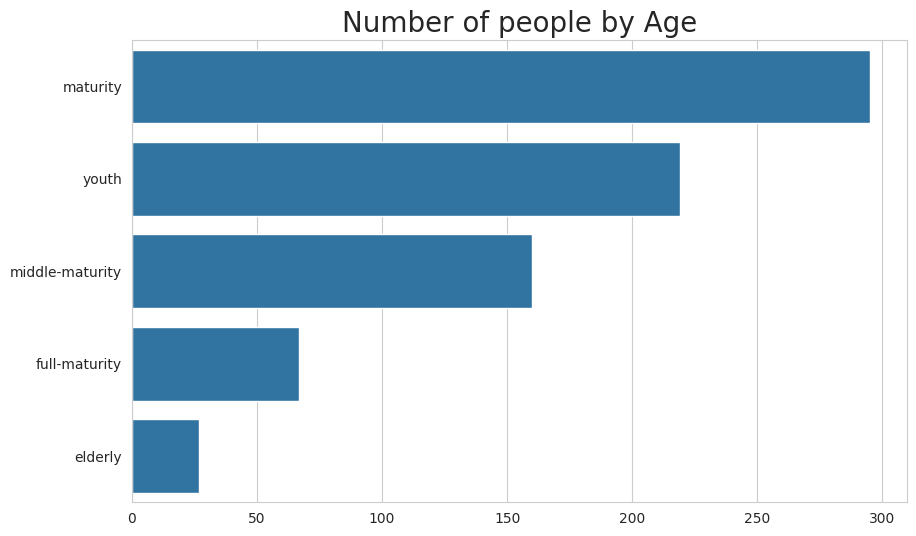

In [43]:
age_count = age_df['Age'].value_counts().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Count',
    y='Age',
    data=age_count,
    errorbar=None,
)

plt.title("Number of people by Age", fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

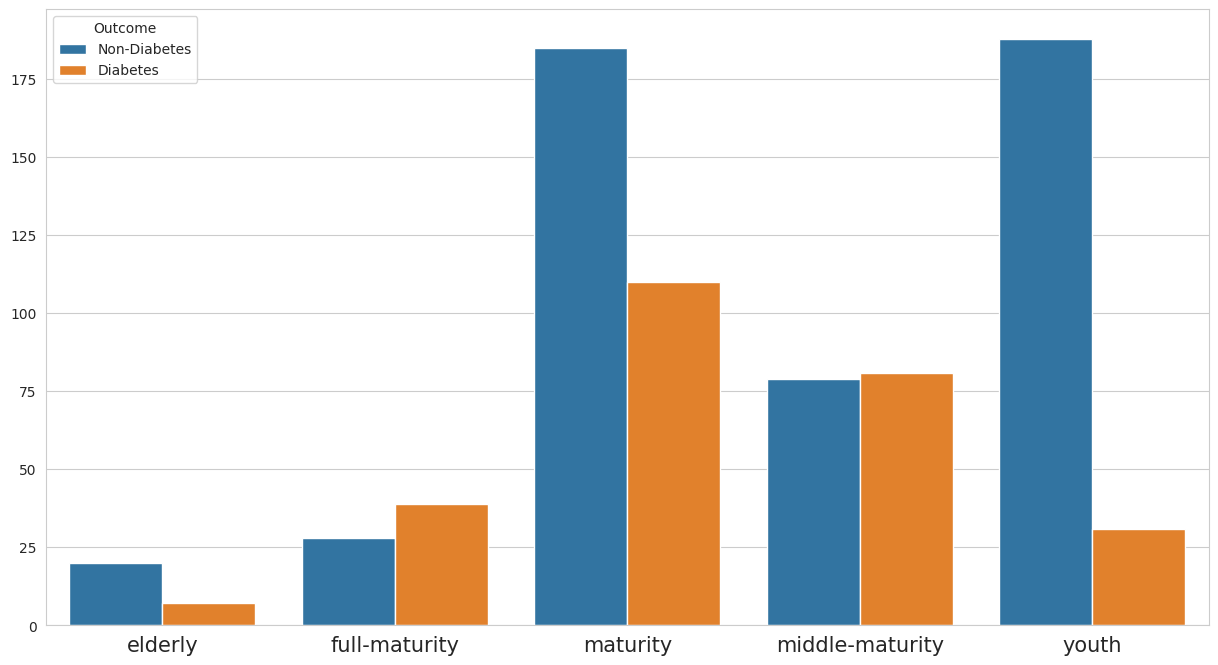

In [44]:
# Melihat demografi penderita diabetes dan non-diabetes berdasarkan umur
byage_df = age_df.groupby(by=['Age', 'Outcome']).size().reset_index(name='Count')
byage_df['Outcome'] = byage_df['Outcome'].map({0: "Non-Diabetes", 1: "Diabetes"})

plt.figure(figsize=(15, 8))

sns.barplot(
    y="Count",
    x="Age",
    hue='Outcome',
    data=byage_df,
    errorbar=None,
)

plt.tick_params(axis='x', labelsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [45]:
# Membuat fungsi untuk menentukan kategori berdasarkan rentang tekanan darah
def check_blood_pressure(blood_pressure):
    if blood_pressure < 80:
        return "normal"
    elif 80 <= blood_pressure <= 89:
        return "pre-hypertension"
    elif 90 <= blood_pressure <= 99:
        return "stage-1-hypertension"
    else:
        return "stage-2-hypertension"


blood_pressure_df = df_imputed.copy()
blood_pressure_df['BloodPressure'] = blood_pressure_df['BloodPressure'].apply(check_blood_pressure)

blood_pressure_df['BloodPressure'].value_counts()

BloodPressure
normal                  558
pre-hypertension        150
stage-1-hypertension     44
stage-2-hypertension     16
Name: count, dtype: int64

In [46]:
# Membuat fungsi untuk menentukan kategori berdasarkan BMI
def check_bmi(bmi):
    if bmi < 18.5:
        return "underweight"
    elif 18.5 <= bmi <= 24.9:
        return "normal"
    elif 25 <= bmi <= 29.9:
        return "overweight"
    else:
        return "obese"


bmi_df = df_imputed.copy()
bmi_df['BMI'] = bmi_df["BMI"].apply(check_bmi)

bmi_df["BMI"].value_counts()

BMI
obese          480
overweight     181
normal         103
underweight      4
Name: count, dtype: int64

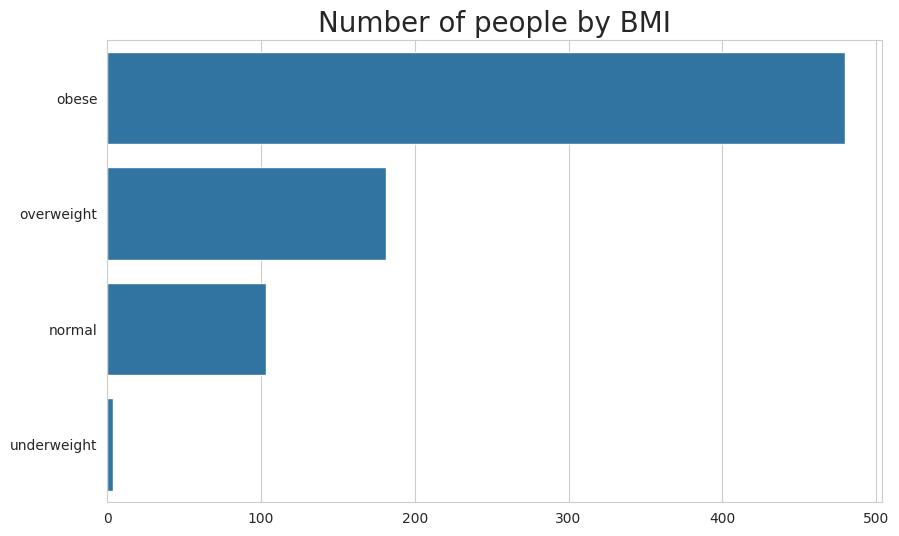

In [47]:
bmi_count = bmi_df['BMI'].value_counts().reset_index(name='Count')

plt.figure(figsize=(10, 6))

sns.barplot(
    y='BMI',
    x='Count',
    data=bmi_count,
    errorbar=None,
)

plt.title("Number of people by BMI", fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [48]:
# Menampilkan hasil diabetes berdasarkan BMI
bmi_df.groupby(by=['BMI', 'Outcome'])['Outcome'].count()

BMI          Outcome
normal       0.0         96
             1.0          7
obese        0.0        259
             1.0        221
overweight   0.0        141
             1.0         40
underweight  0.0          4
Name: Outcome, dtype: int64

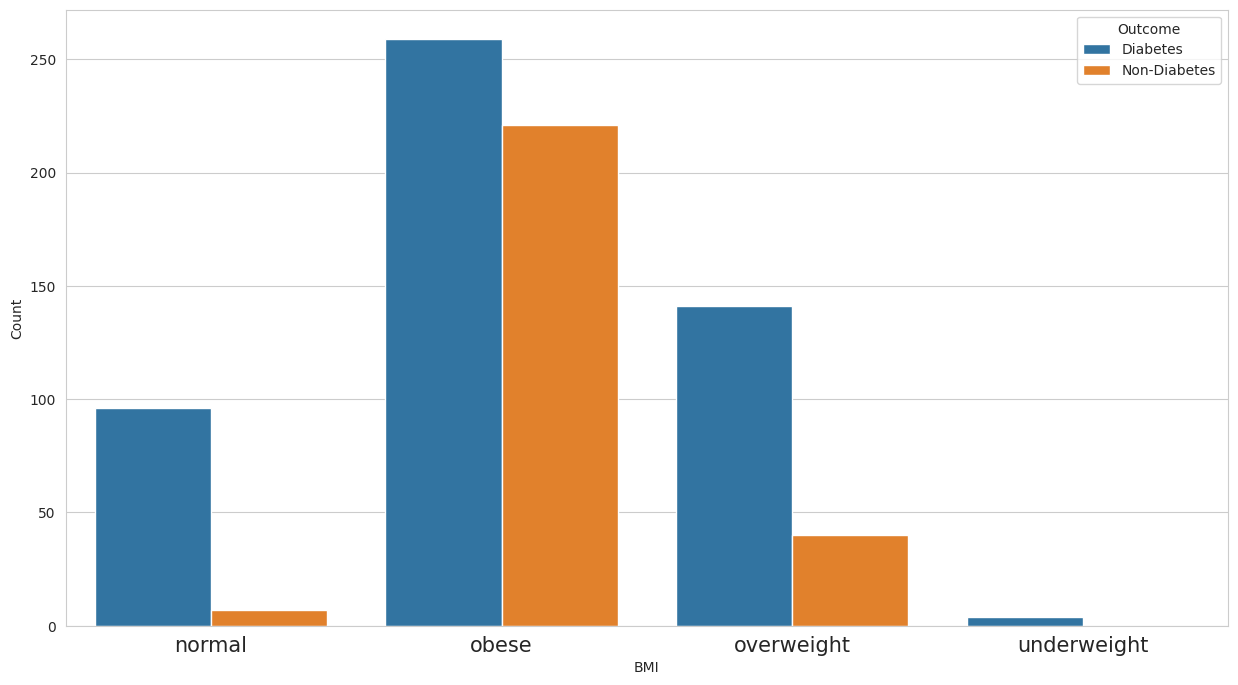

In [49]:
# Melihat demografi penderita diabetes dan non-diabetes berdasarkan BMI
bybmi_df = bmi_df.groupby(by=['BMI', 'Outcome']).size().reset_index(name='Count')
bybmi_df['Outcome'] = bmi_df['Outcome'].map({0: "Non-Diabetes", 1: "Diabetes"})

plt.figure(figsize=(15, 8))

sns.barplot(
    y='Count',
    x='BMI',
    hue='Outcome',
    data=bybmi_df,
    errorbar=None
)

plt.tick_params(axis='x', labelsize=15)
plt.show()

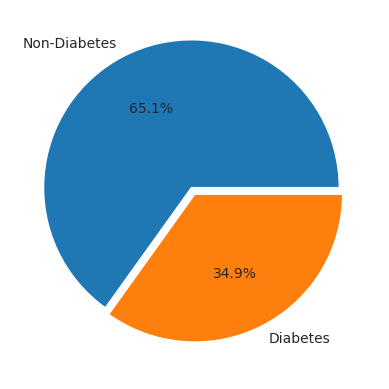

In [50]:
# Menghitung jumlah data berdasarkan hasil diabetes (0 dan 1)
outcome_count = df_imputed['Outcome'].value_counts().tolist()

plt.pie(
    x=outcome_count,
    labels=('Non-Diabetes', 'Diabetes'),
    autopct='%1.1f%%',
    explode=(0.05, 0)
)

plt.show()

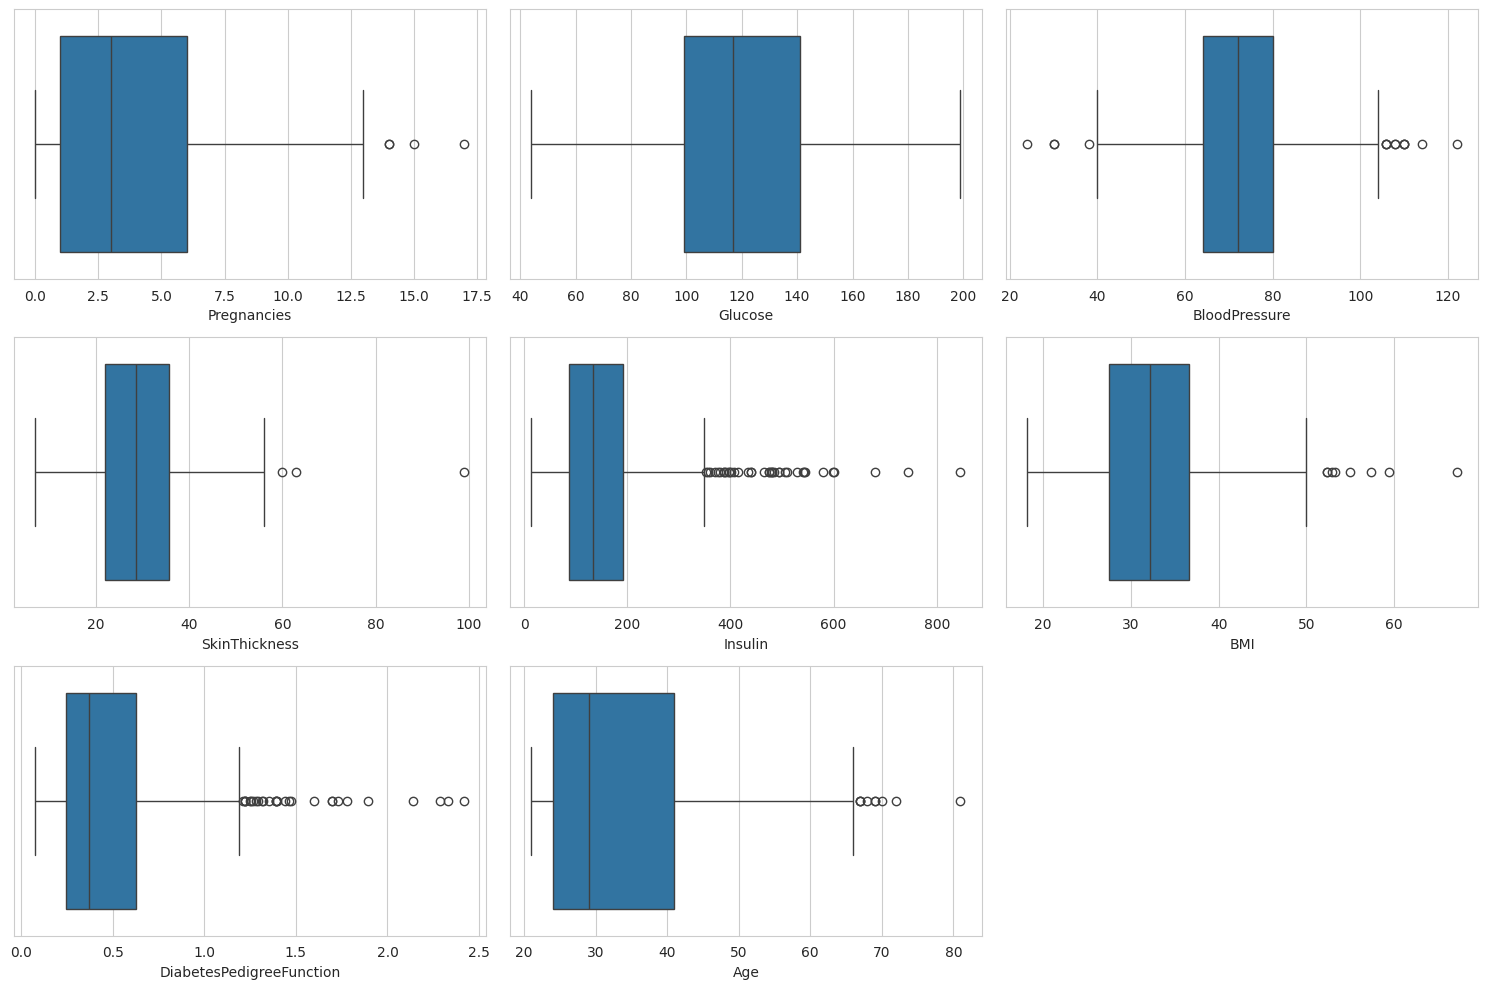

In [52]:
# Melihat distribusi pada data kuantitatif
df_columns = df_imputed.drop(columns=['Outcome']).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(df_columns):
    sns.boxplot(x=df_imputed[column], ax=axes[i])

# Menghapus subplot yang tidak terpakai jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

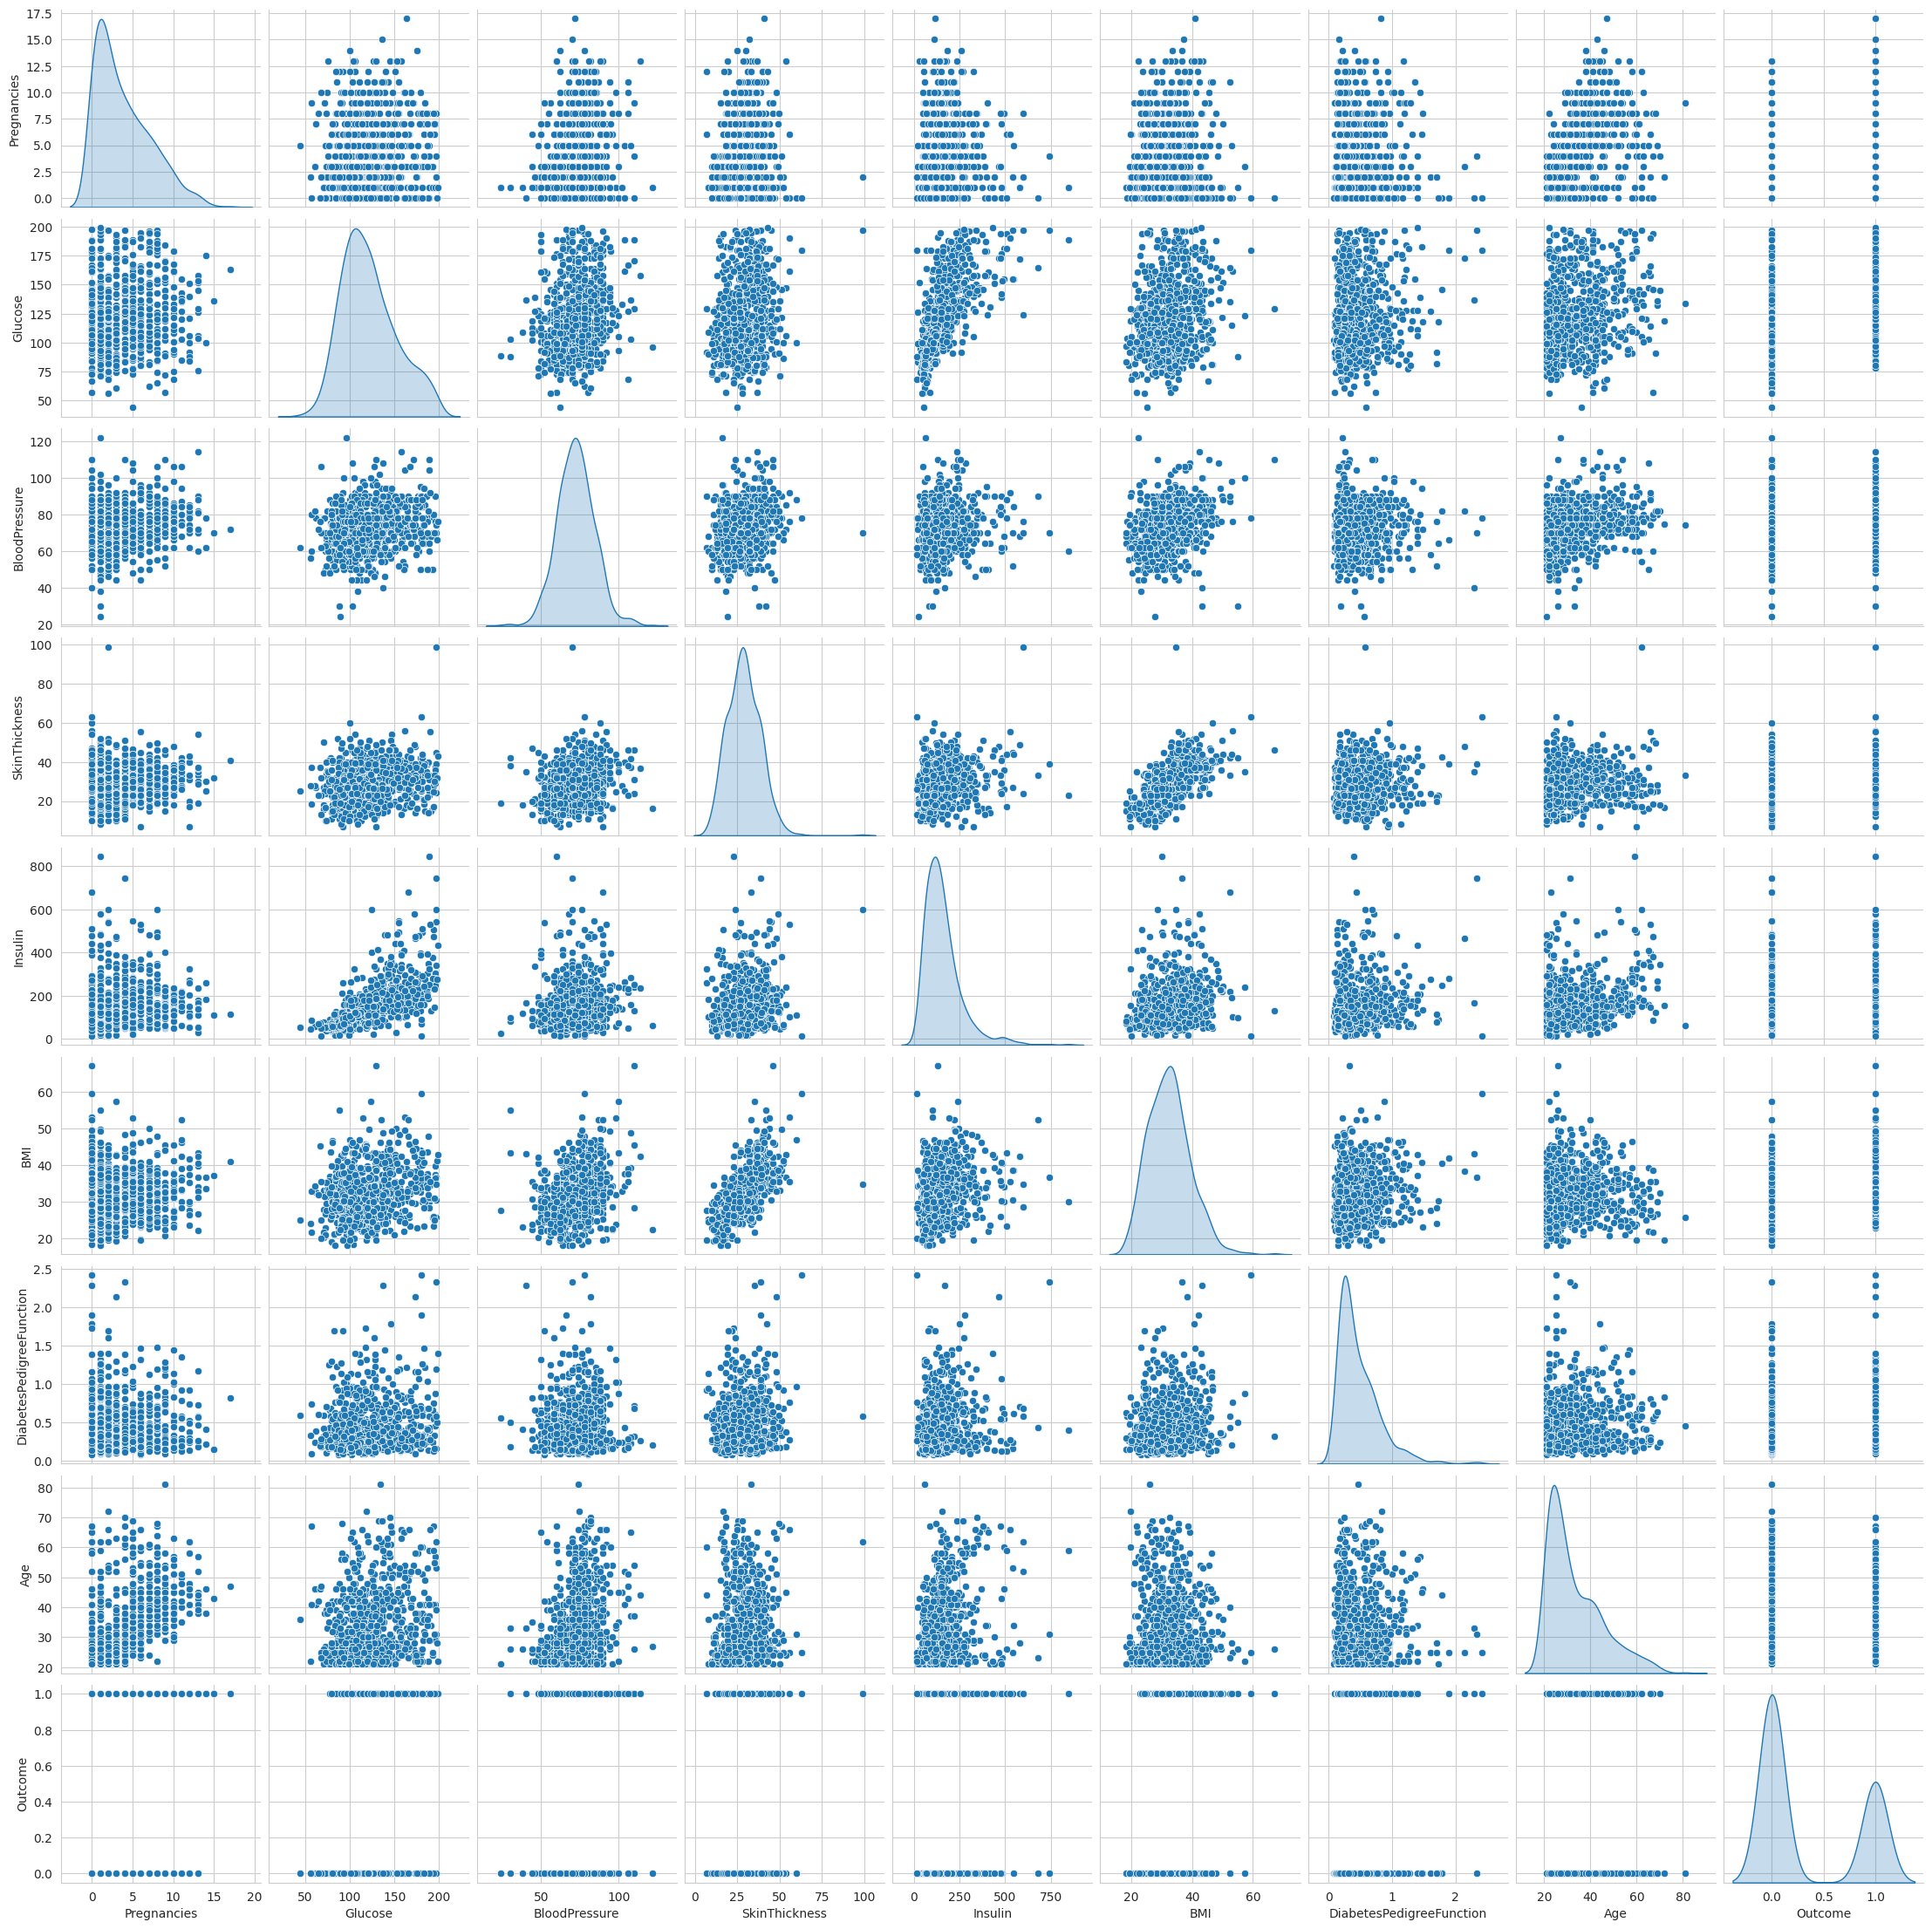

In [54]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_imputed, diag_kind='kde')

## **Data Preparation**

### **Standardization of Features**

In [55]:
# Standarisasi fitur numerik
scaler = MinMaxScaler()

# Memilih fitur numerik
std_numeric = df_imputed.drop(columns=['Outcome']).columns

# Membuat dataframe baru
diabetes_std_df = df_imputed.copy()

# Melakukan standarisasi
diabetes_std_df[std_numeric] = scaler.fit_transform(df_imputed[std_numeric])

diabetes_std_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.207632,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.037969,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.124130,0.273846,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.200180,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.211630,0.164435,0.243354,0.115713,0.433333,1.0


### **Spliting Data Features and Target**

In [56]:
# Memisahkan data mejadi fitur dan label
X = diabetes_std_df.drop(columns=['Outcome'])
y = diabetes_std_df['Outcome']

### **Features Selection**

In [57]:
# Embedded Methods
# menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Mendapatkan fitur penting
importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]

# Meenentukan ambang batas untuk fitur penting
threshold = 0.05
important_features_indices = [i for i in range(len(importance)) if importance[i] >= threshold]

# Menampilkan fitur penting beserta nilainya
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    # Jika X asli berbentuk DataFrame, maka kita ambil nama kolom
    print(f"{X.columns[i]}: {importance[i]}")

# Mendapatkan nama kolom penting berdasarkan importace
important_features = X.columns[important_features_indices]

# Memindahkan fitur penting ke variabel baru
X_important = X[important_features]

# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
Pregnancies: 0.06873551951947743
Glucose: 0.22475626847355526
BloodPressure: 0.07509541391644892
SkinThickness: 0.09986172219176605
Insulin: 0.17110280288621152
BMI: 0.14526452237262127
DiabetesPedigreeFunction: 0.10451621792842884
Age: 0.11066753271149082

Dimensi data pelatihan dengan fitur penting: (768, 8)


### **SMOTE Oversampling**

In [58]:
# Mengecek distribusi kelas target
Counter(diabetes_std_df['Outcome'].map({0: "Non-Diabetes", 1: "Diabetes"}))

Counter({'Non-Diabetes': 500, 'Diabetes': 268})

In [131]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling pada dataset
X_resampled, y_resampled = smote.fit_resample(X_important, y)

# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled.map({0: "Non-Diabetes", 1: "Diabetes"})))

# Mengubah hasil menjadi DataFrame untuk analisis lebih lanjut
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled, name='Target')

Distribusi kelas setelah SMOTE: Counter({'Diabetes': 500, 'Non-Diabetes': 500})


### **Dimension Reduction**

In [132]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(X_resampled)

pca.explained_variance_.round(3)

array([0.07 , 0.045, 0.023, 0.018, 0.017, 0.01 ])

### **Spliting Data Training and Testing**

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

## **Building Model**

In [134]:
# Pelatihan model
random_forest = RandomForestClassifier(random_state=42).fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
lr = LogisticRegression(random_state=42).fit(X_train, y_train)

print("Training model selesai")

Training model selesai


## **Evaluation Model**

In [135]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    evaluate_results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred)
    }

    return evaluate_results


# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Random Forest': evaluate_model(random_forest, X_test, y_test),
    'KNN': evaluate_model(knn, X_test, y_test),
    'LR': evaluate_model(lr, X_test, y_test)
}


def print_evaluate_model(result_list):
    # Memuat dataframe untuk meringkas hasil
    summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean Squared Error'])

    # Mengisi dataframe dengan hasil
    rows = []
    for model_name, metrics in result_list.items():
        rows.append({
            'Model': model_name,
            'Accuracy': metrics['Accuracy'],
            'Precision': metrics['Precision'],
            'Recall': metrics['Recall'],
            'F1 Score': metrics['F1 Score'],
            'Mean Squared Error': metrics['Mean Squared Error']
        })

    # Mengkonversi daftar kamus menjadi dataframe
    summary_df = pd.DataFrame(rows)

    # Menampilkan dataframe
    print(summary_df)


print_evaluate_model(results)

           Model  Accuracy  Precision    Recall  F1 Score  Mean Squared Error
0  Random Forest      0.78   0.761468  0.821782  0.790476                0.22
1            KNN      0.78   0.761468  0.821782  0.790476                0.22
2             LR      0.78   0.776699  0.792079  0.784314                0.22


In [136]:
# Membuat fungsi untuk melakukan ploting hasil evaluasi confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

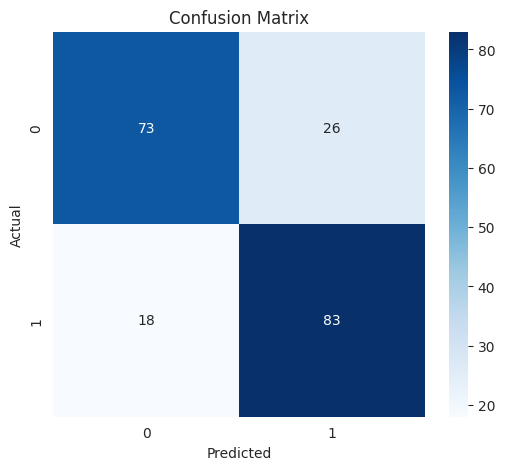

In [137]:
# Plot hasil model Random Forest
plot_confusion_matrix(results['Random Forest']['Confusion Matrix'])

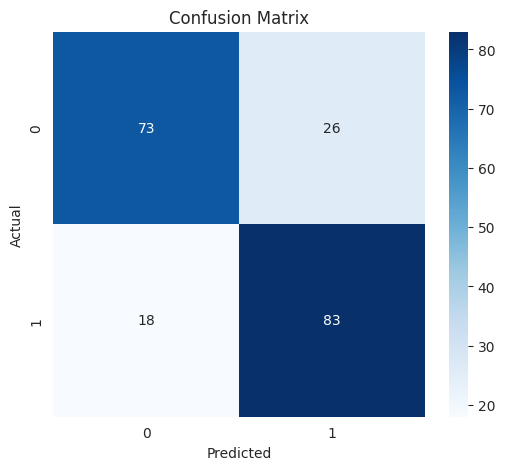

In [138]:
# Plot hasil model Ada Boost
plot_confusion_matrix(results['KNN']['Confusion Matrix'])

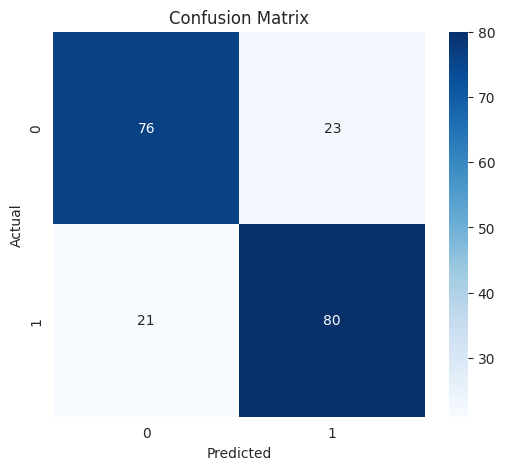

In [139]:
plot_confusion_matrix(results['LR']['Confusion Matrix'])

## **Tuning Model**

In [140]:
# Definisikan parameter grid untuk Grid Search (Random Forest)
param_grid_rf = {
    'n_estimators': [10, 50, 100, 300],
    'max_depth': np.arange(1, 10, 1),
    'min_samples_split': np.arange(2, 10, 1)
}

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, n_jobs=1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
best_rf_grid = grid_search_rf.best_estimator_

# Evaluasi performa model pada test set
grid_search_rf_score = best_rf_grid.score(X_test, y_test)
print((f"Accuracy RF after Grid Search: {grid_search_rf_score}"))

# Menyimpan hasil tuning
n_estimators = grid_search_rf.best_params_['n_estimators']
max_depth = grid_search_rf.best_params_['max_depth']
min_samples_split = grid_search_rf.best_params_['min_samples_split']

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END .max_depth=1, min_samples_split=2, n

In [141]:
# Definisikan parameter grid untuk Grid Search
param_grid_knn = {
    'n_neighbors': np.arange(5, 20, 1),
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

# Inisialisasi GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=1, verbose=2)
grid_search_knn.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")
best_knn_grid = grid_search_knn.best_estimator_

# Evaluasi performa model pada test set
grid_search_knn_score = best_knn_grid.score(X_test, y_test)
print((f"Accuracy KNN after Grid Search: {grid_search_knn_score}"))

# Menyimpan hasil tuning
n_neighbors = grid_search_knn.best_params_['n_neighbors']
metric = grid_search_knn.best_params_['metric']

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=7; total time=   0.0s
[CV] END ....................metric=minkowski, 

In [142]:
# Definisikan parameter grid untuk Grid Search
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Inisialisasi GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, n_jobs=1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search_lr.best_params_}")
best_lr_grid = grid_search_lr.best_estimator_

# Evaluasi performa model pada test set
grid_search_score_lr = best_lr_grid.score(X_test, y_test)
print(f"Accuracy LR after Grid Search: {grid_search_score_lr:.2f}")

# Menyimpan hyperparameter terbaik di vairabel
best_c_lr = grid_search_lr.best_params_['C']
best_penalty = grid_search_lr.best_params_['penalty']
best_solver = grid_search_lr.best_params_['solver']

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2

/home/refanzzzz/miniconda3/envs/diabetes-predictive-analytic/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/refanzzzz/miniconda3/envs/diabetes-predictive-analytic/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/refanzzzz/miniconda3/envs/diabetes-predictive-analytic/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^

## **Evaluasi Model Klasifikasi setelah Tuning**

In [143]:
# Inisialisasi model klasifikasi setelah dilakukan tuning
rf_tuning = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42).fit(X_train, y_train)
knn_tuning = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric).fit(X_train, y_train)
lr_tuning = LogisticRegression(C=best_c_lr, penalty=best_penalty, solver=best_solver, random_state=42).fit(X_train, y_train)

# Evaluasi ulang model
results_after_tuning = {
    'Random Forest': evaluate_model(rf_tuning, X_test, y_test),
    'KNN': evaluate_model(knn_tuning, X_test, y_test),
    'LR': evaluate_model(lr_tuning, X_test, y_test)
}

# Menampilkan hasil evaluasi setelah tuning
print_evaluate_model(results_after_tuning)

           Model  Accuracy  Precision    Recall  F1 Score  Mean Squared Error
0  Random Forest      0.78   0.747826  0.851485  0.796296                0.22
1            KNN      0.78   0.761468  0.821782  0.790476                0.22
2             LR      0.78   0.771429  0.801980  0.786408                0.22


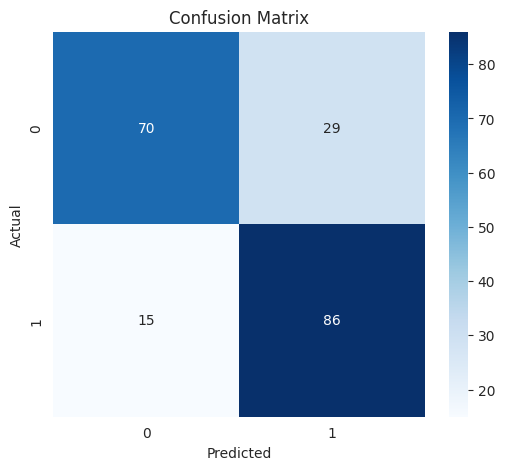

In [144]:
plot_confusion_matrix(results_after_tuning['Random Forest']['Confusion Matrix'])

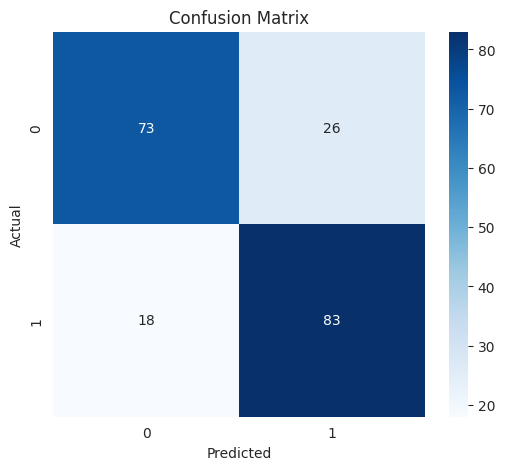

In [146]:
plot_confusion_matrix(results_after_tuning['KNN']['Confusion Matrix'])

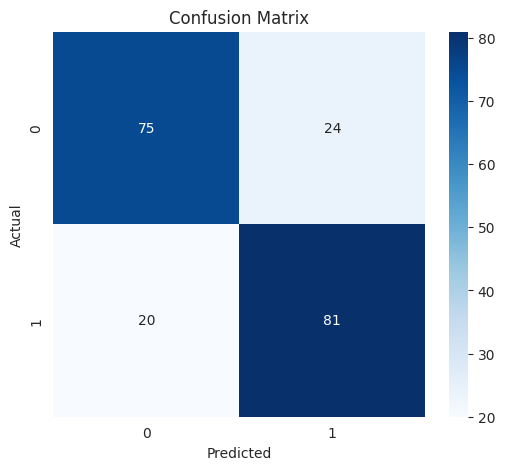

In [147]:
plot_confusion_matrix(results_after_tuning['LR']['Confusion Matrix'])

In [160]:
y_train_pred_knn = knn_tuning.predict(X_train)
y_test_pred_knn = knn_tuning.predict(X_test)

train_mse_knn = mean_squared_error(y_train, y_train_pred_knn)
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)

print("Training MSE:", train_mse_knn)
print("Test MSE:", test_mse_knn)

Training MSE: 0.1475
Test MSE: 0.22


In [161]:
y_train_pred_rf = rf_tuning.predict(X_train)
y_test_pred_rf = rf_tuning.predict(X_test)

train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print("Training MSE:", train_mse_rf)
print("Test MSE:", test_mse_rf)

Training MSE: 0.025
Test MSE: 0.22


In [162]:
y_train_pred_lr = lr_tuning.predict(X_train)
y_test_pred_lr = lr_tuning.predict(X_test)

train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

print("Training MSE:", train_mse_lr)
print("Test MSE:", test_mse_lr)

Training MSE: 0.24
Test MSE: 0.22


In [163]:
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

print("KNN Training Accuracy:", train_acc_knn)
print("KNN Test Accuracy", test_acc_knn)

KNN Training Accuracy: 0.8525
KNN Test Accuracy 0.78


In [164]:
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print("RF Training Accuracy:", train_acc_rf)
print("RF Test Accuracy", test_acc_rf)

RF Training Accuracy: 0.975
RF Test Accuracy 0.78


In [165]:
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

print("LR Training Accuracy:", train_acc_lr)
print("LR Test Accuracy", test_acc_lr)

LR Training Accuracy: 0.76
LR Test Accuracy 0.78
